In [1]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as P
from scipy import stats

import textwrap

import warnings
warnings.filterwarnings( "ignore")
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn import linear_model as linear

In [11]:
src = '../hpcc/traditional/'
dst = '../hpcc/traditional/results/'
col_labels =['Batch Name', 'Scan Name',
             'Nut Length','Nut Height', 'Nut Width',
             'Nut Volume',
             'Nut VA3D',
             'Nut Feret Ratio',
             'Nut Inverse Feret Ratio',
             'Nut Surface Area',
             'Nut Sphericity',
             'Nut Convex Surface Area',
             'Nut Convex Volume',
             'Nut Convex Area Ratio',
             'Nut Convex Volume Ratio',
             'Nut Convex Area Inverse Ratio',
             'Nut Convex Volume Inverse Ratio',
             'Krumbein Index',
             'Corey Index',
             'Sneed Index',
             'Janke Index',
             'Wadell Index',
             'Air Volume', 'Kernel Volume', 'Shell Volume', 'Packing Volume',
             'Air Volume Ratio', 'Kernel Volume Ratio', 'Shell Volume Ratio', 'Packing Volume Ratio',
             'Shell Rugosity',
             'Shell Thickness','Shell Thickness2','Shell Thickness3','Shell Thickness4',
             'External Shell Ratio', 'Bulge Shell Ratio', 'Protruding Shell Ratio',
             'External Shell Volume', 'Bulge Shell Volume', 'Protruding Shell Volume',
             'Kernel Length', 'Kernel Height', 'Kernel Width',
             'Kernel Surface Area',
             'Kernel Convex Volume',
             'Kernel Convex Surface Area',
             'Kernel Convex Area Ratio',
             'Kernel Convex Area Inverse Ratio',
             'Kernel Convex Volume Ratio',
             'Kernel Convex Volume Inverse Ratio']
col_units = ['', '',
             ' [mm]',' [mm]', ' [mm]',
             ' [mm$^3$]',
             '',
             '',
             '',
             ' [mm$^2$]',
             '',
             ' [mm$^2$]',
             ' [mm$^3$]',
             '',
             '',
             '',
             '',
             '',
             '',
             '',
             '',
             '',
             ' [mm$^3$]', ' [mm$^3$]', ' [mm$^3$]', ' [mm$^3$]',
             '', '', '', '',
             '',
             ' [mm]',' [mm]',' [mm]',' [mm]',
             '', '', '',
             ' [mm$^3$]', ' [mm$^3$]', ' [mm$^3$]',
             ' [mm]', ' [mm]', ' [mm]',
             ' [mm$^2$]',
             ' [mm$^3$]',
             ' [mm$^2$]',
             '',
             '',
             '',
             '']
filename = src + 'traditional_phenotypes_merged.csv'
df = pd.read_csv(filename, dtype={1:str})
print(df.shape)
df.head()

(1264, 66)


,bname,wname,nut_length,nut_height,nut_width,nut_vol,nut_va3d,nut_ratio_feret,nut_inv_ratio_feret,nut_area,...,ShellThickness,PackingTissue,KernelFill,%TipShrivel,%MinorShrivel,%MajorShrivel,Plumpness,EaseOfRemoval,PercentKernel,%Blank
0,2008SB_R4_T13,001,41.750477,33.582913,31.395051,20387.149371,4.941865,1.329843,0.751969,6147.314265,...,1.5,6.0,5.0,0.0,0.0,0.0,4.0,6.0,48.389312,0.0
1,2008SB_R4_T13,002,39.720443,33.450554,31.454860,20512.900734,4.643222,1.262776,0.791906,6045.635968,...,1.5,6.0,5.0,0.0,0.0,0.0,4.0,6.0,48.389312,0.0
2,2008SB_R4_T13,003,42.790987,35.768852,33.257804,24394.576769,4.596968,1.286645,0.777215,6763.478980,...,1.5,6.0,5.0,0.0,0.0,0.0,4.0,6.0,48.389312,0.0
3,2008SB_R4_T13,004,39.589858,34.400643,31.931823,21020.676969,4.496373,1.239825,0.806566,6079.521052,...,1.5,6.0,5.0,0.0,0.0,0.0,4.0,6.0,48.389312,0.0
4,2008SB_R4_T13,005,38.284326,34.049830,31.365337,19995.849647,4.335537,1.220594,0.819274,5809.316020,...,1.5,6.0,5.0,0.0,0.0,0.0,4.0,6.0,48.389312,0.0


```
2	Nut Length
3	Nut Height
4	Nut Width
5	Nut Volume
6	Nut VA3D
7	Nut Feret Ratio
8	Nut Inverse Feret Ratio
9	Nut Surface Area
10	Nut Sphericity
11	Nut Convex Surface Area
12	Nut Convex Volume
13	Nut Convex Area Ratio
14	Nut Convex Volume Ratio
15	Nut Convex Area Inverse Ratio
16	Nut Convex Volume Inverse Ratio
17	Krumbein Index
18	Corey Index
19	Sneed Index
20	Janke Index
21	Wadell Index
22	Air Volume
23	Kernel Volume
24	Shell Volume
25	Packing Volume
26	Air Volume Ratio
27	Kernel Volume Ratio
28	Shell Volume Ratio
29	Packing Volume Ratio
30	Shell Rugosity
31	Shell Thickness
32	Shell Thickness2
33	Shell Thickness3
34	Shell Thickness4
35	External Shell Ratio
36	Bulge Shell Ratio
37	Protruding Shell Ratio
38	External Shell Volume
39	Bulge Shell Volume
40	Protruding Shell Volume
41	Kernel Length
42	Kernel Height
43	Kernel Width
44	Kernel Surface Area
45	Kernel Convex Volume
46	Kernel Convex Surface Area
47	Kernel Convex Area Ratio
48	Kernel Convex Area Inverse Ratio
49	Kernel Convex Volume Ratio
50	Kernel Convex Volume Inverse Ratio
```

# Regression

In [28]:
fixtrait = 27
mask = list(range(2,fixtrait)) + list(range(fixtrait,51))
X = df.iloc[:,mask].values
print(X.shape)
y = df.iloc[:,fixtrait].values
print(y.shape)

(1264, 49)
(1264,)


In [29]:
alphas = np.sort(np.hstack((10**np.linspace(-4,0,5), 5*10**np.linspace(-4,-1,4))))
clf = linear.RidgeCV(alphas=alphas).fit(X,y)
clf.score(X,y)

0.9995351353408085

In [30]:
clf.alpha_

0.0001

../hpcc/traditional/results/spearman_correlation_ext


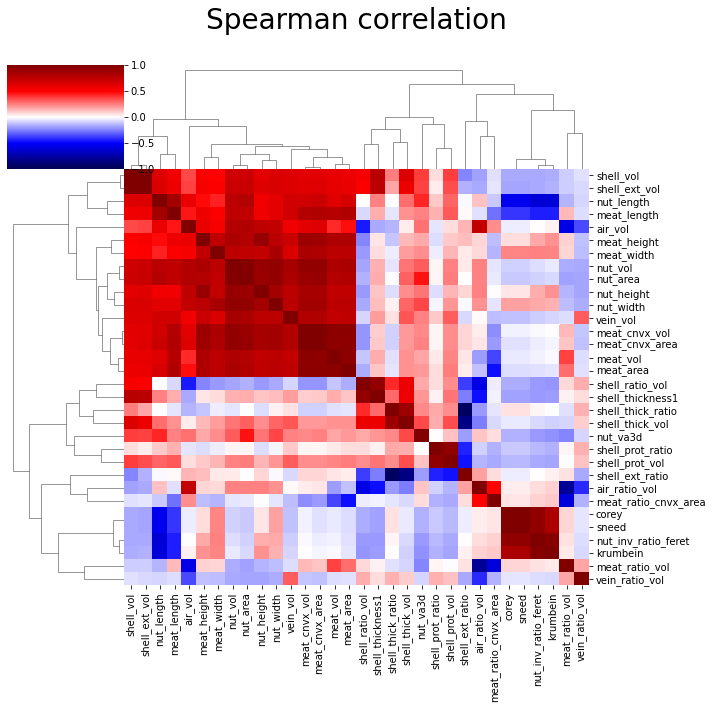

In [25]:
vmin, vmax = -1,1
cmap = 'seismic'

sns.clustermap(scorr, method='complete', vmax=vmax, vmin=vmin, cmap=cmap);
plt.subplots_adjust(top=0.9)
plt.suptitle('Spearman correlation', fontsize=28);

filename = dst + 'spearman_correlation_ext'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

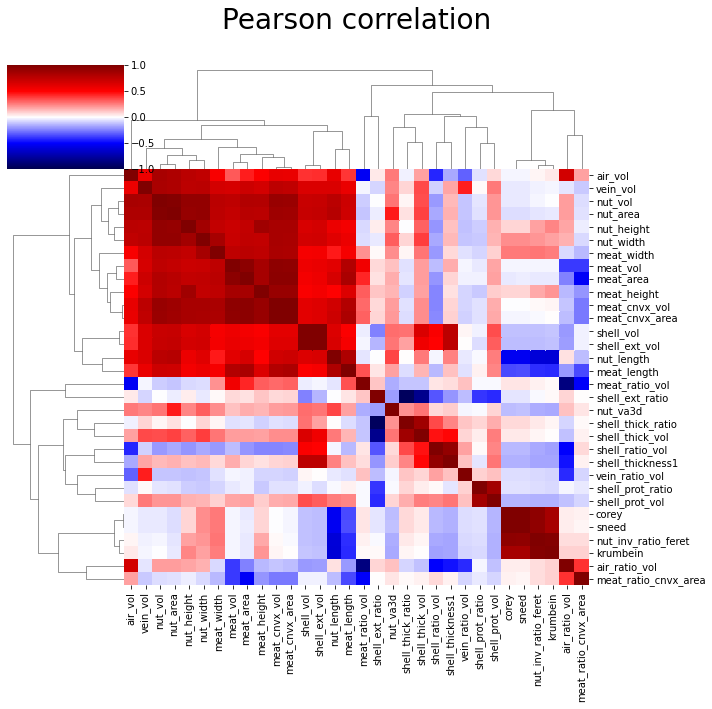

In [26]:
sns.clustermap(pcorr, method='complete', vmax=vmax, vmin=vmin, cmap=cmap);
plt.subplots_adjust(top=0.9)
plt.suptitle('Pearson correlation', fontsize=28);

filename = dst + 'pearson_correlation_ext'
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# Linear models

In [27]:
# mmtraits = [2,3,4,5,6,8,9,17,18,19,22,23,24,25,26,27,28,29,31,32,33,34,35]
# mmtraits = np.asarray(mmtraits)
mmtraits = np.arange(2, 51)

ols_m = np.zeros((len(mmtraits), len(mmtraits)))
ols_b = ols_m.copy()
ols_r = ols_m.copy()
ols_p = ols_m.copy()
ols_R2 = ols_m.copy()

for i in range(len(ols_m)):
    for j in range(len(ols_m)):
        nonzero_i = set(np.nonzero(data.iloc[:,mmtraits[i]].values)[0])
        nonzero_j = set(np.nonzero(data.iloc[:,mmtraits[j]].values)[0])
        
        nonzero = np.asarray(list(nonzero_i & nonzero_j))
        
        trait_i = np.log(data.iloc[nonzero,mmtraits[i]].values)
        trait_j = np.log(data.iloc[nonzero,mmtraits[j]].values)
    
        ols = stats.linregress(trait_i, trait_j)
        
        ols_R2[i,j] = r2_score(trait_j, ols.slope*trait_i + ols.intercept)
        ols_m[i, j] = ols.slope
        ols_b[i, j] = ols.intercept
        ols_p[i, j] = ols.pvalue
        ols_r[i, j] = ols.rvalue

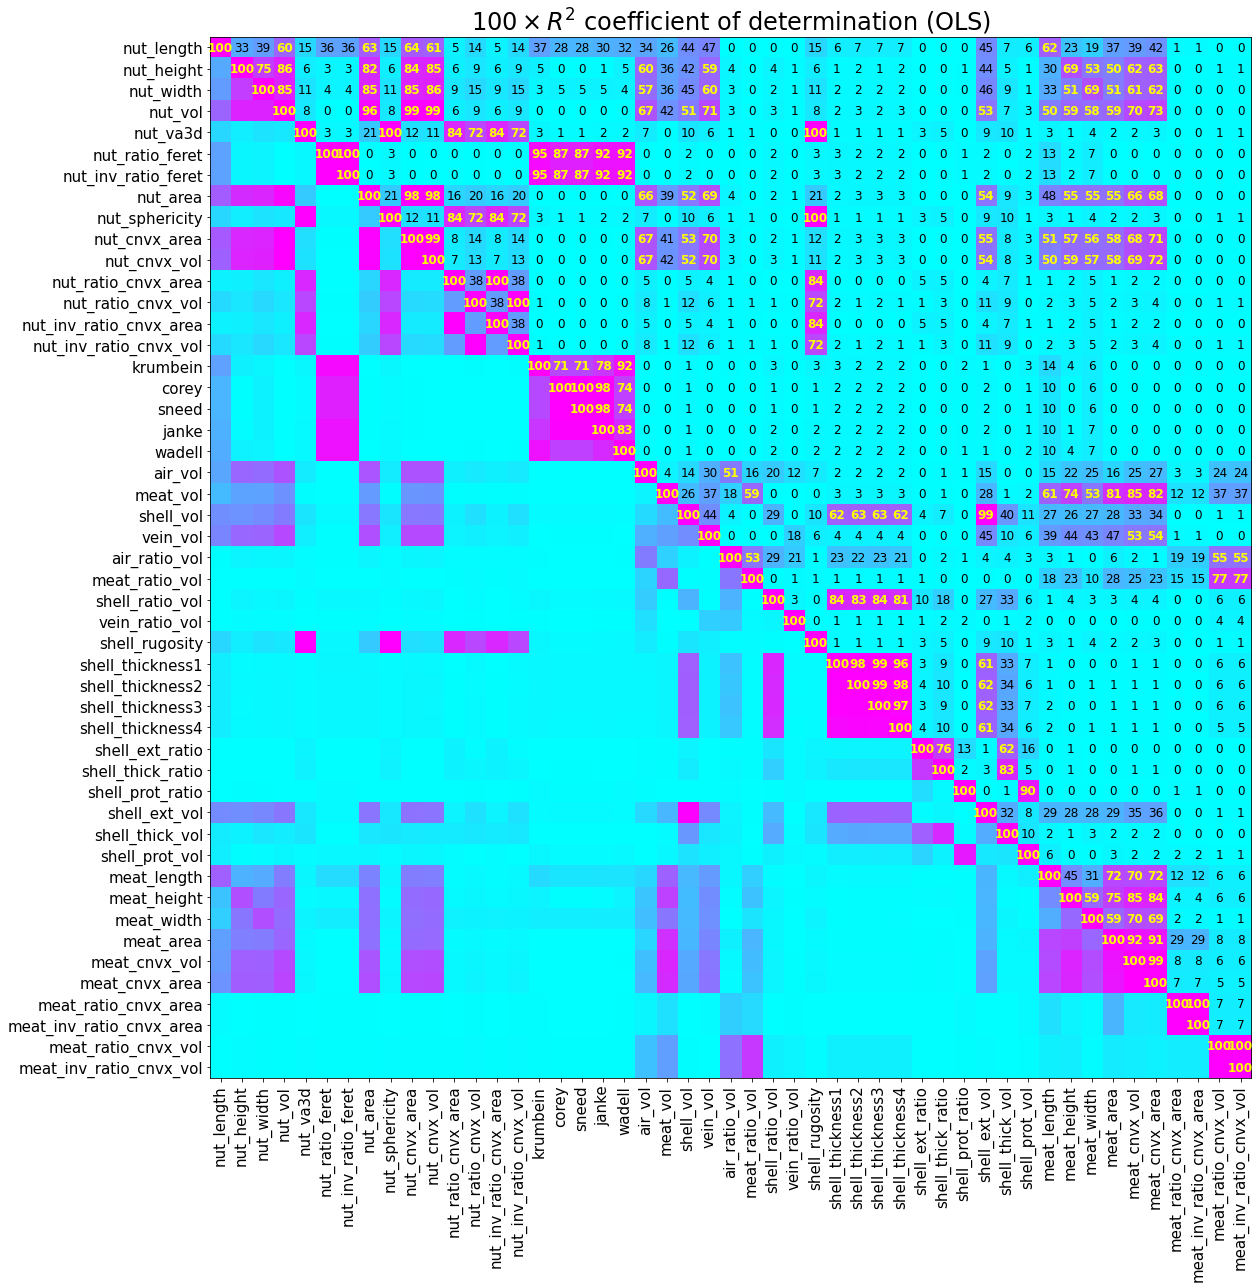

In [28]:
fig, ax = plt.subplots(figsize=(18,18))
im = ax.imshow(ols_R2, cmap='cool', vmin=0, vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(ols_r)))
ax.set_yticks(np.arange(len(ols_r)))
# ... and label them with the respective list entries
ax.set_xticklabels(data.columns[mmtraits])
ax.set_yticklabels(data.columns[mmtraits])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va ='center',
         rotation_mode="anchor")

ax.tick_params(labelsize=15)

# Loop over data dimensions and create text annotations.
for i in range(len(ols_r)):
    for j in range(i,len(ols_r) ):
        if ols_R2[i,j] > 0.5:
            tcolor = 'yellow'
            fw = 'bold'
            fs = 14
        else:
            tcolor = 'black'
            fw = 'normal'
            fs = 12
        text = ax.text(j, i, '{:d}'.format(int(100*ols_R2[i, j])),
                       ha="center", va="center", color=tcolor, fontsize=12, fontweight=fw)

ax.set_title("$100 \\times R^2$ coefficient of determination (OLS)", fontsize=24)
fig.tight_layout()

filename = dst + 'OLS_R2_ext'
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

In [29]:
signif = np.asarray(np.nonzero((ols_R2 < 0.97) & (ols_R2 > 0.75)))
signif = signif[:,signif[0] < signif[1]]
#signif = signif[:,::2]
print(signif.shape)
for i in range(signif.shape[1]):
    print(i,np.round(ols_R2[signif[0,i],signif[1,i]], 2),col_labels[signif[0,i]+2],'--',col_labels[signif[1,i] + 2], sep='\t')

(2, 47)
0	0.76	Nut Height	--	Nut Width
1	0.86	Nut Height	--	Nut Volume
2	0.83	Nut Height	--	Nut Surface Area
3	0.84	Nut Height	--	Nut Convex Surface Area
4	0.86	Nut Height	--	Nut Convex Volume
5	0.86	Nut Width	--	Nut Volume
6	0.85	Nut Width	--	Nut Surface Area
7	0.86	Nut Width	--	Nut Convex Surface Area
8	0.87	Nut Width	--	Nut Convex Volume
9	0.97	Nut Volume	--	Nut Surface Area
10	0.85	Nut VA3D	--	Nut Convex Area Ratio
11	0.85	Nut VA3D	--	Nut Convex Area Inverse Ratio
12	0.96	Nut Feret Ratio	--	Krumbein Index
13	0.88	Nut Feret Ratio	--	Corey Index
14	0.88	Nut Feret Ratio	--	Sneed Index
15	0.93	Nut Feret Ratio	--	Janke Index
16	0.93	Nut Feret Ratio	--	Wadell Index
17	0.96	Nut Inverse Feret Ratio	--	Krumbein Index
18	0.88	Nut Inverse Feret Ratio	--	Corey Index
19	0.88	Nut Inverse Feret Ratio	--	Sneed Index
20	0.93	Nut Inverse Feret Ratio	--	Janke Index
21	0.93	Nut Inverse Feret Ratio	--	Wadell Index
22	0.85	Nut Sphericity	--	Nut Convex Area Ratio
23	0.85	Nut Sphericity	--	Nut Convex Area

# Link to categorical traits from Pat Brown

In [191]:
fs = 15
marker = ['o', 'v','*','^', 's', '<', 'X', '>', 'p', '8', 'h', 'H', 'D', 'd', 'P']
#col_wong = ['#e69f00', '#009e73', '#0072b2', '#d55e00', '#cc79a7', '#f0e442', '#56b4e9']
col_wong = ['#d81b60', '#1e88e5', '#ffc107', '#004d40', '#56e495']
col_wong += col_wong


cattraitnames = ['EaseOfRemoval',
                 'ShellStrength',
                 'ShellTexture',
                 'ShellIntegrity',
                 'ShellColor',
                 'SEAL',
                 'PackingTissue',
                 'KernelFill',
                 'Plumpness']

In [29]:
for cattraitname in cattraitnames:
#    cattraitname = cattraitnames[-1]

    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)

    fig, ax = plt.subplots(16,3, figsize=(18,45), sharex=False)
    ax = np.atleast_1d(ax).ravel()
    #traitidx = [5,9,13,14,26,27,28,29,31,37,40,41]
    traitidx = list(range(3,51))
    traitidx = traitidx[:len(ax)]

    for idx,i in enumerate(traitidx):
        trait_i = df.iloc[:,i].values
        boxplot = []
        for k in range(len(cattrait)):
            mask = df[cattraitname] == cattrait[k]
            ax[idx].scatter(np.random.default_rng().uniform(-1,1,np.sum(mask))*.33 + k,
                            trait_i[mask],
                            color=col_wong[k], marker=marker[k], s=60, alpha=0.25)
            boxplot.append(trait_i[mask])
        ax[idx].boxplot(boxplot, notch=False, sym='', vert=True, positions=range(len(cattrait)), widths=0.7,
                        medianprops = {'color':col_wong[-2], 'lw':4})
        ax[idx].set_ylabel(col_labels[i], fontsize=fs)
        ax[idx].set_xticks(range(len(cattrait)))
        ax[idx].set_xticklabels(cattrait)
        ax[idx].tick_params(labelsize=12)


    fig.suptitle(cattraitname, fontsize=24)
    fig.tight_layout()

    filename = dst + 'squal_' + cattraitname + '_scatter'
    plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
    plt.close()

# PCA

In [8]:
pcamask = list(range(2,51))
#pcamask = list(range(2,6)) + [7] + list(range(9,15)) + list(range(17,30)) + [31] + list(range(35,48)) + [49]

imgfeats = df.iloc[:,pcamask].values.copy()
scaler = prep.StandardScaler().fit(imgfeats)
imgfeats = scaler.transform(imgfeats)
print(imgfeats.shape)

(1264, 49)


In [86]:
pca = decomp.PCA(n_components=2, svd_solver='full')
pca.fit(imgfeats)

print(100*pca.explained_variance_ratio_[:10])
print(pca.singular_values_[:10])
print(100*np.cumsum(pca.explained_variance_ratio_)[:10])

redux = pca.transform(imgfeats)
print(redux.shape)

[32.4513097  16.73128764]
[141.77109429 101.79730012]
[32.4513097  49.18259734]
(1264, 2)


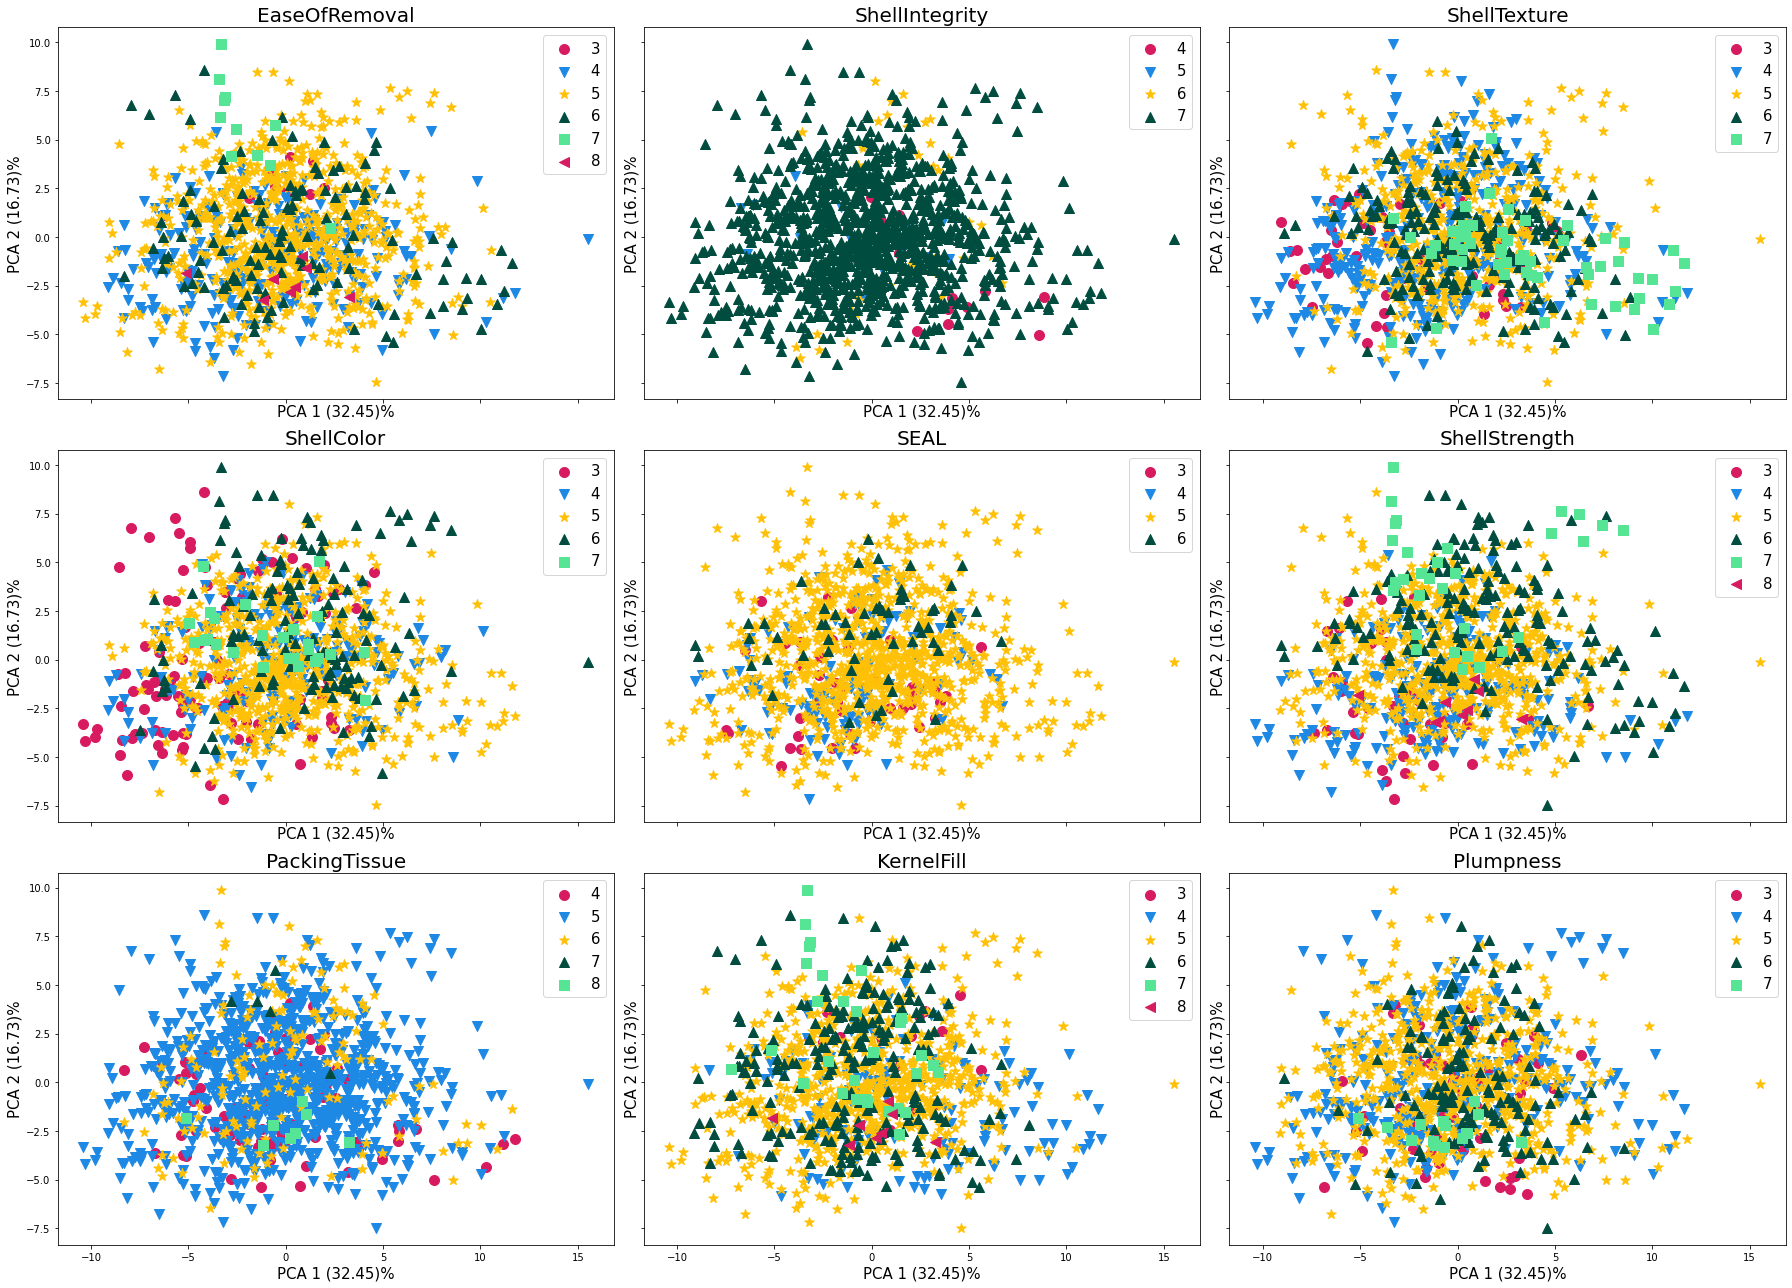

In [89]:
fs = 15
fig, ax = plt.subplots(3,3, figsize=(25,18), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(redux[mask,0],
                        redux[mask,1],
                        color=col_wong[k], marker=marker[k], s=100, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=20);
    ax[idx].set_xlabel('PCA 1 ({:.2f})%'.format(pca.explained_variance_ratio_[0]*100), fontsize=fs)
    ax[idx].set_ylabel('PCA 2 ({:.2f})%'.format(pca.explained_variance_ratio_[1]*100), fontsize=fs);
    ax[idx].set_aspect('equal')

fig.tight_layout();
filename = dst + 'PCA_ver2_scatter'
#plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

In [104]:
r = np.sqrt(np.max(pca.components_[0]**2 + pca.components_[1]**2))
an = np.linspace(0, 2 * np.pi, 100)

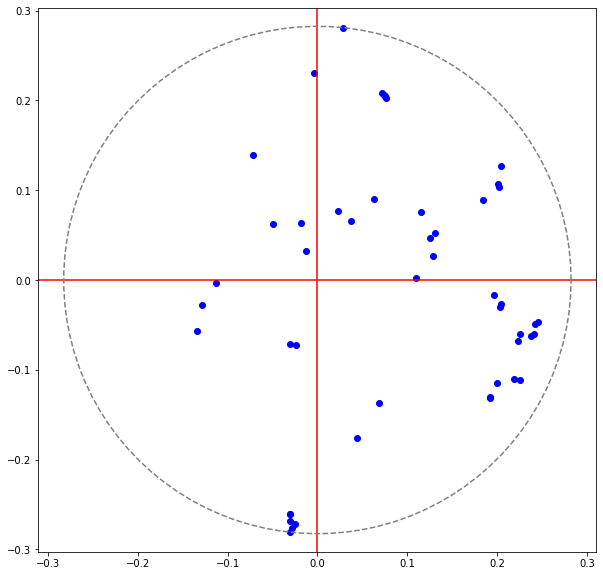

In [106]:
fig, ax = plt.subplots(1,1, figsize=(10,10), sharex=True, sharey=False)
ax = np.atleast_1d(ax).ravel()

idx = 0
ax[idx].axvline(0, c='r')
ax[idx].axhline(0, c='r')
ax[idx].plot(r*np.cos(an), r*np.sin(an), ls='--', c='gray')
ax[idx].scatter(pca.components_[0], pca.components_[1], c='b');
ax[idx].axis('equal');

In [111]:
foo = np.sqrt(pca.components_[0]**2 + pca.components_[1]**2)
sortarr = np.argsort(foo)[::-1]
sort_labels = np.asarray(col_labels)[sortarr]
for i in range(10):
    print(i+1, np.round(foo[sortarr[i]],2), sort_labels[i], sep='\t')

1	0.28	Nut Volume
2	0.28	Nut VA3D
3	0.28	Nut Convex Area Inverse Ratio
4	0.27	Sneed Index
5	0.27	Corey Index
6	0.26	Krumbein Index
7	0.26	Nut Convex Volume Inverse Ratio
8	0.25	Nut Length
9	0.25	Nut Feret Ratio
10	0.25	Nut Sphericity


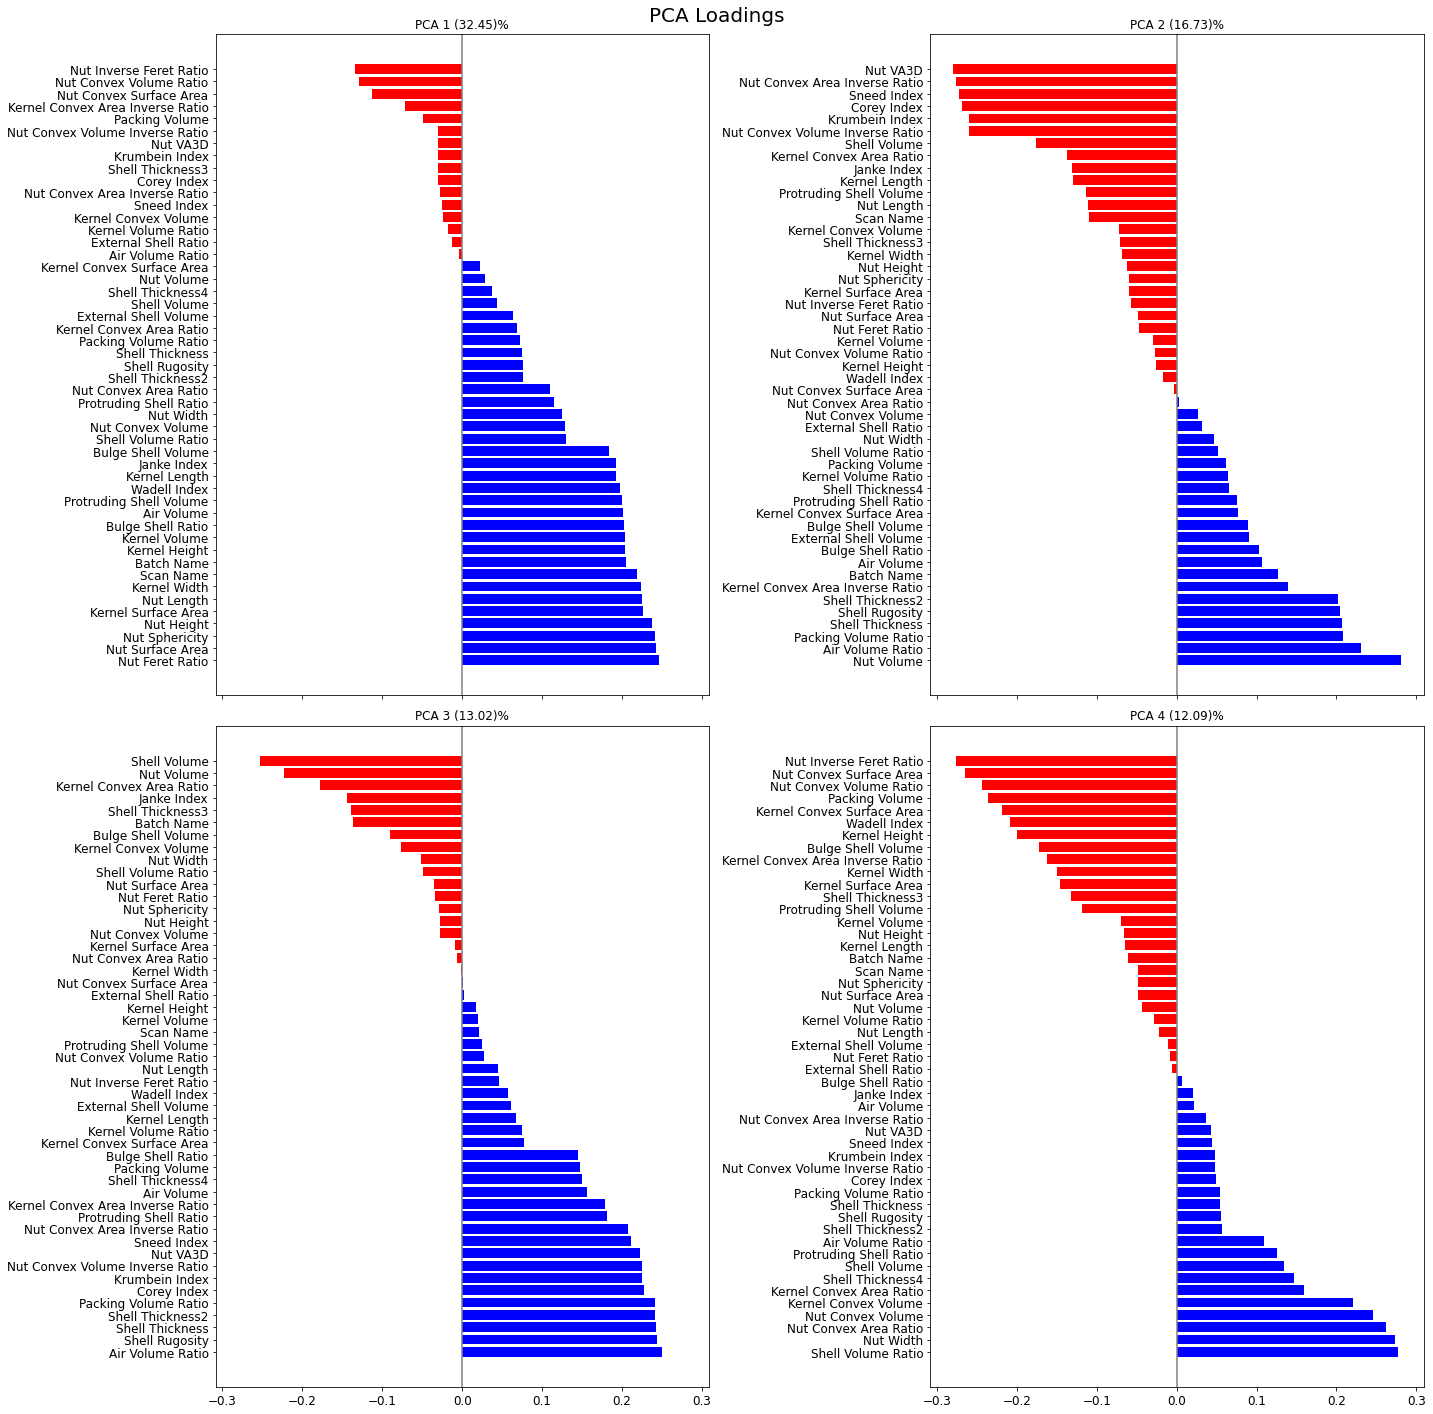

In [78]:
fs = 12
fig, ax = plt.subplots(2,2, figsize=(20,20), sharex=True, sharey=False)
ax = np.atleast_1d(ax).ravel()

idx = 0
#ax[idx].set_ylabel('PCA Loadings', fontsize=fs)

for idx in range(len(ax)):
    sortpos = np.sum(pca.components_[idx] > 0)
    sortarr = np.argsort(pca.components_[idx])[::-1]
    sort_labels = np.asarray(col_labels)[sortarr]

    ax[idx].barh(range(sortpos), pca.components_[idx][sortarr][:sortpos], color='b')
    ax[idx].barh(range(sortpos, len(pca.components_)), pca.components_[idx][sortarr][sortpos:], color='r')
    ax[idx].axvline(0,c='gray')
    ax[idx].set_yticks(range(len(pca.components_)))
    ax[idx].set_yticklabels(sort_labels);
    ax[idx].tick_params('x', labelrotation=0, labelsize=fs);
    ax[idx].tick_params('y', labelsize=fs);
    ax[idx].set_title('PCA {} ({:.2f})%'.format(idx+1, pca.explained_variance_ratio_[idx]*100), fontsize=fs)

fig.suptitle('PCA Loadings', fontsize=20)
fig.tight_layout();

filename = dst + 'PCA_loadings_h'
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# KPCA

In [187]:
kpca = decomp.KernelPCA(n_components=3, 
                        kernel='cosine', 
                        gamma = 0.05, 
                        degree = 3,
                        coef0 = 2.5,
                        fit_inverse_transform=False, eigen_solver='dense')
kredux = kpca.fit_transform(imgfeats)
print(kredux.shape)

(1264, 3)


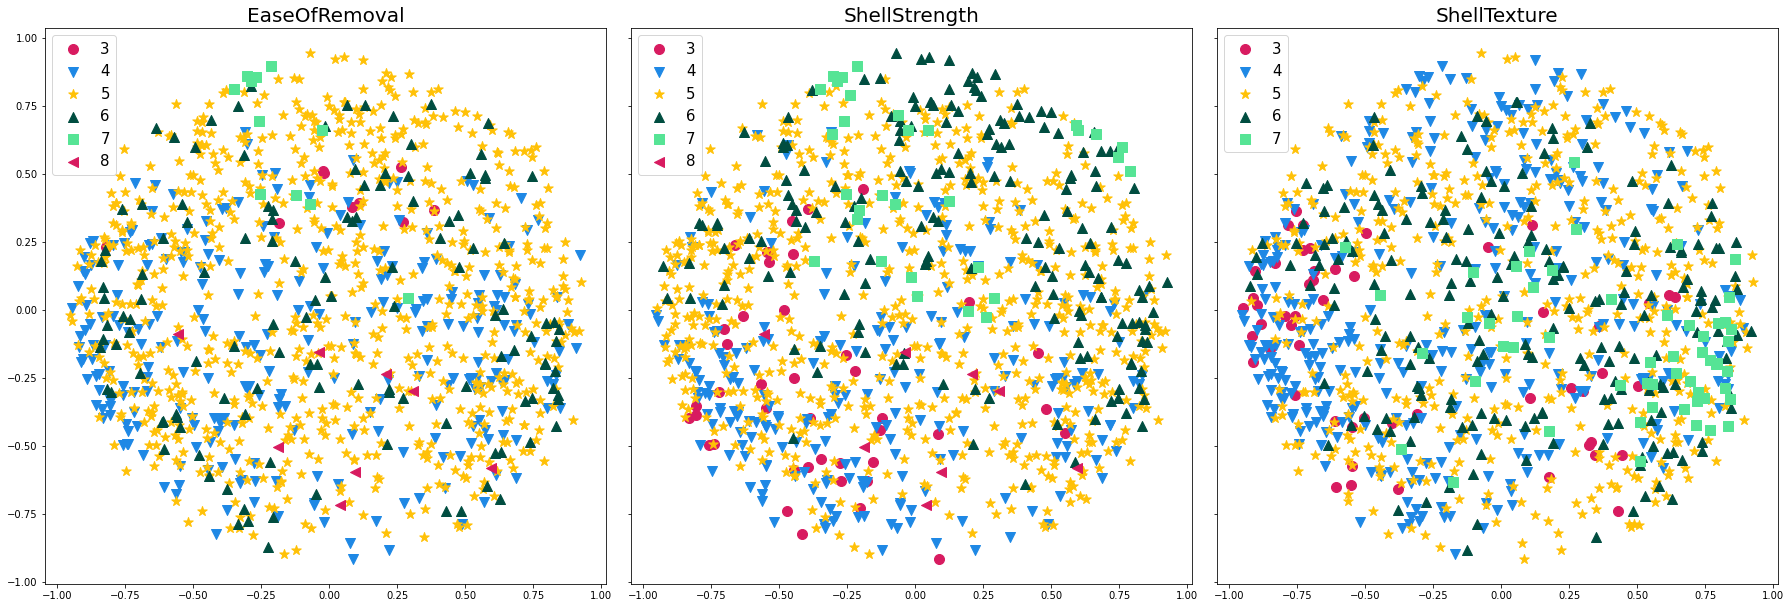

In [192]:
fs = 15
fig, ax = plt.subplots(1,3, figsize=(25,18), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(kredux[mask,0],
                        kredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=100, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=20);
    #ax[idx].set_xlabel('KPCA 1', fontsize=fs)
    #ax[idx].set_ylabel('KPCA 2', fontsize=fs);
    ax[idx].set_aspect('equal')

fig.tight_layout();
filename = dst + 'KPCA_rbf_scatter'
#plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# Isomap

In [202]:
iso = mfold.Isomap(n_components=2, n_neighbors=16)
iredux = iso.fit_transform(imgfeats)
print(iredux.shape)

(1264, 2)


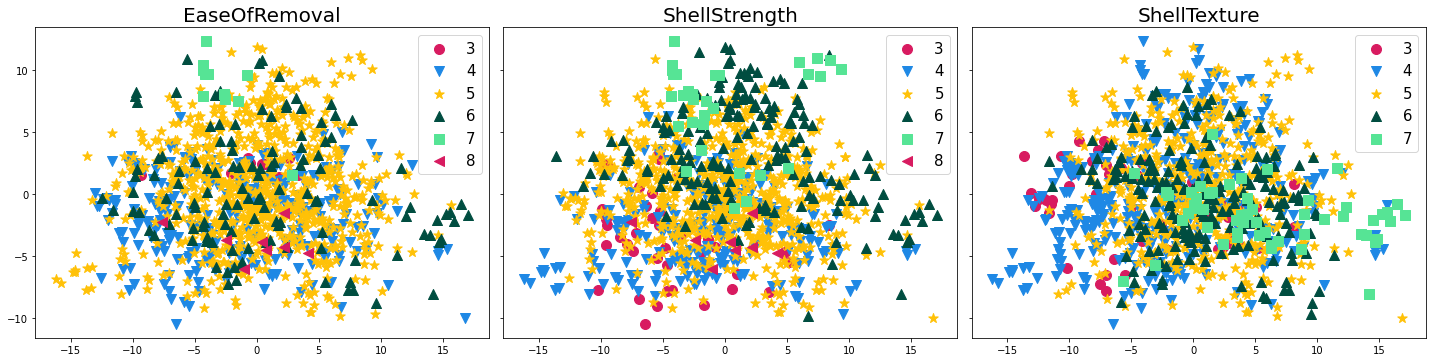

In [203]:
fs = 15
fig, ax = plt.subplots(1,3, figsize=(20,8), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(iredux[mask,0],
                        iredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=100, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=20);
    #ax[idx].set_xlabel('KPCA 1', fontsize=fs)
    #ax[idx].set_ylabel('KPCA 2', fontsize=fs);
    ax[idx].set_aspect('equal')

fig.tight_layout();
filename = dst + 'KPCA_rbf_scatter'
#plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# LLE

(1264, 2)


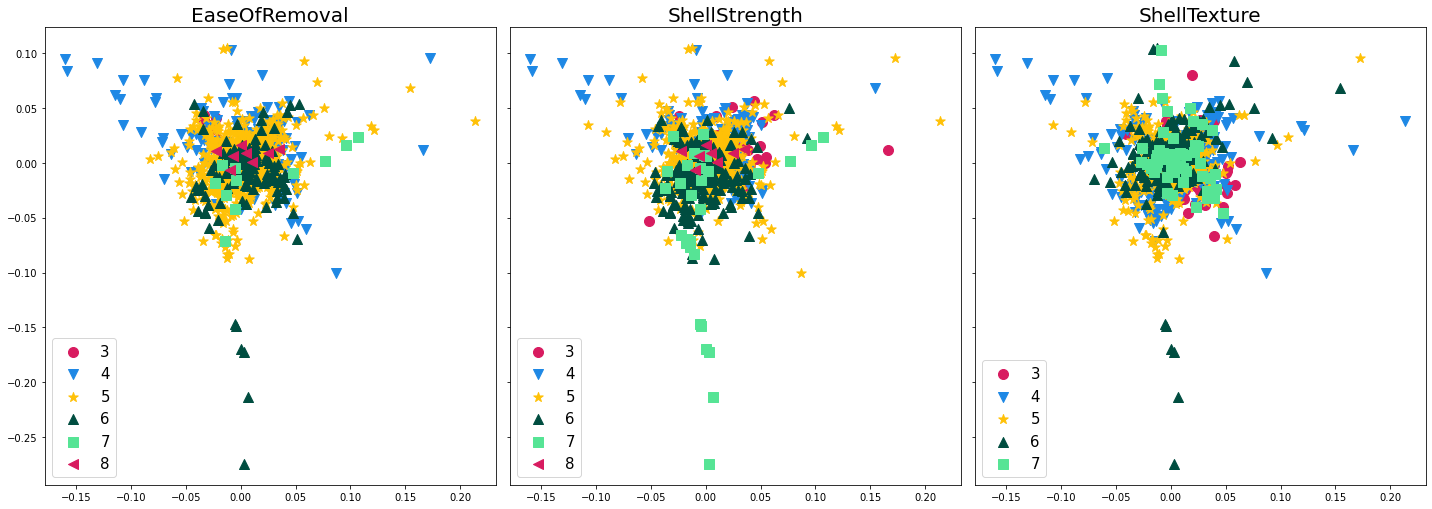

In [223]:
lle = mfold.LocallyLinearEmbedding(n_components=2, n_neighbors=12)
lredux = lle.fit_transform(imgfeats)
print(lredux.shape)

fs = 15
fig, ax = plt.subplots(1,3, figsize=(20,8), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(lredux[mask,0],
                        lredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=100, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=20);
    #ax[idx].set_xlabel('KPCA 1', fontsize=fs)
    #ax[idx].set_ylabel('KPCA 2', fontsize=fs);
    ax[idx].set_aspect('equal')

fig.tight_layout();
filename = dst + 'KPCA_rbf_scatter'
#plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# Spectral Embedding

(1264, 2)


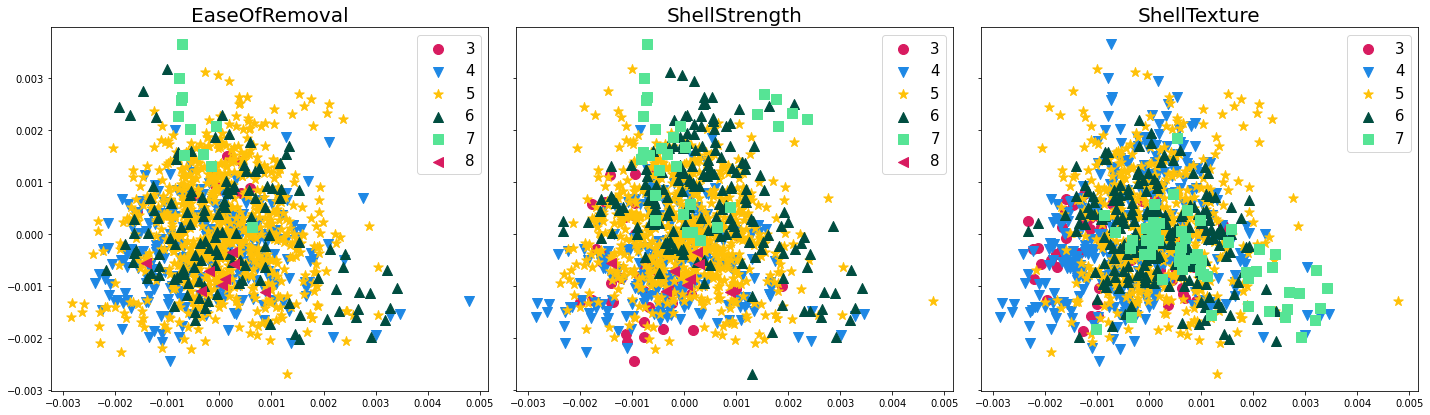

In [218]:
se = mfold.SpectralEmbedding(n_components=2,
                             affinity = 'rbf', #nearest_neighbors,
                             gamma = 0.005,
                             n_neighbors = 22)

sredux = se.fit_transform(imgfeats)
print(lredux.shape)

fs = 15
fig, ax = plt.subplots(1,3, figsize=(20,8), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(sredux[mask,0],
                        sredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=100, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=20);
    #ax[idx].set_xlabel('KPCA 1', fontsize=fs)
    #ax[idx].set_ylabel('KPCA 2', fontsize=fs);
    ax[idx].set_aspect('equal')

fig.tight_layout();
filename = dst + 'KPCA_rbf_scatter'
#plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# MDS

(1264, 2)


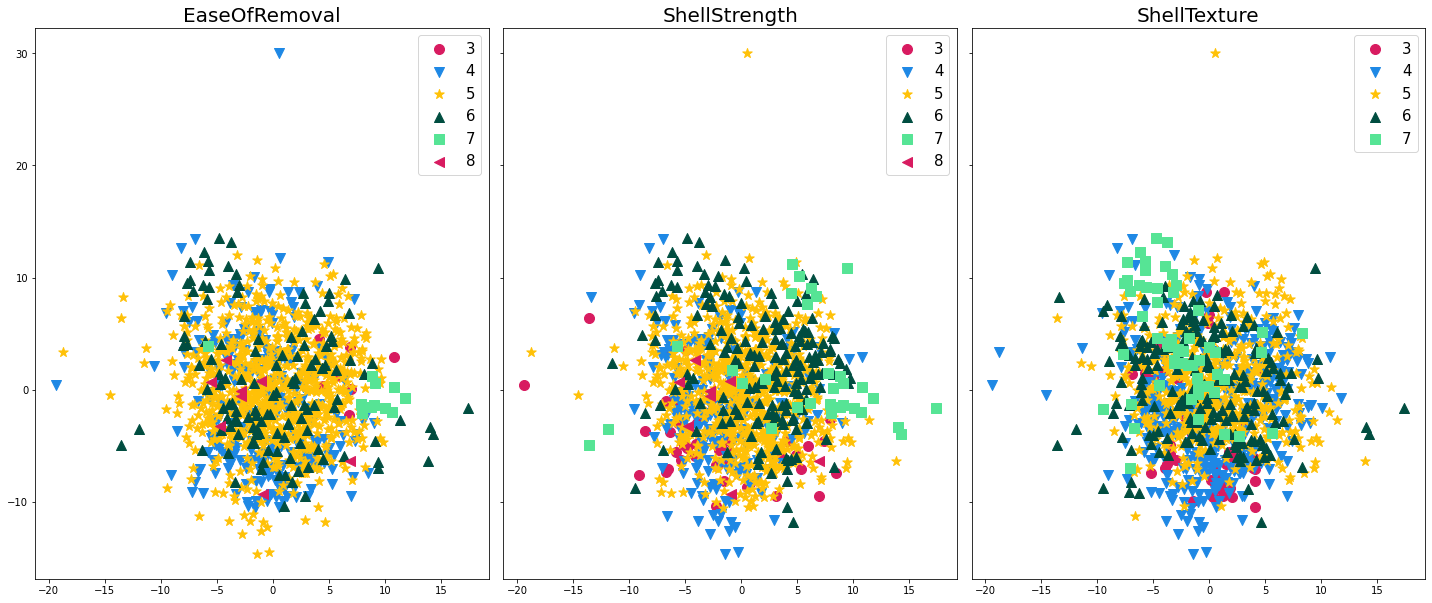

In [232]:
mds = mfold.MDS(n_components=2, metric=True,
                n_init = 10, dissimilarity='euclidean')

mredux = mds.fit_transform(imgfeats)
print(lredux.shape)

fs = 15
fig, ax = plt.subplots(1,3, figsize=(20,8), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(mredux[mask,0],
                        mredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=100, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=20);
    #ax[idx].set_xlabel('KPCA 1', fontsize=fs)
    #ax[idx].set_ylabel('KPCA 2', fontsize=fs);
    ax[idx].set_aspect('equal')

fig.tight_layout();
filename = dst + 'KPCA_rbf_scatter'
#plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# t-SNE

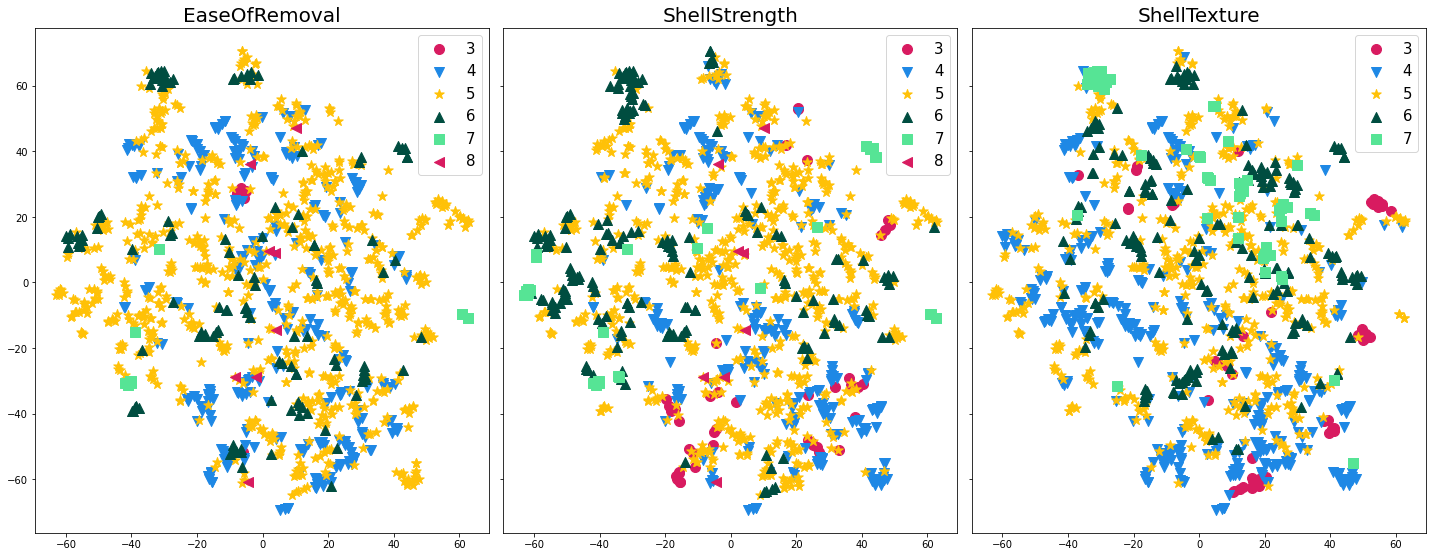

In [231]:
tredux = mfold.TSNE(n_components=2, perplexity=12, early_exaggeration=20).fit_transform(imgfeats)

fs = 15
fig, ax = plt.subplots(1,3, figsize=(20,8), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(tredux[mask,0],
                        tredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=100, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=20);
    #ax[idx].set_xlabel('KPCA 1', fontsize=fs)
    #ax[idx].set_ylabel('KPCA 2', fontsize=fs);
    ax[idx].set_aspect('equal')

fig.tight_layout();
filename = dst + 'KPCA_rbf_scatter'
#plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})